# Messunsicherheiten beim Schwerependel

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Messung der Periodendauer aus der Vorlesung:

In [2]:
T_messwert = 1.3

## Schrecksekunde - Statistische Messunsicherheit

Erstelle ein Array oder ein DataFrame deiner persönlichen Messdaten um die Schrecksekunde zu ermitteln.

In [3]:
T_schrecksekunde = np.array([5.1, 4.9, 4.9, 5.0, 4.9, 5.05])
T_schrecksekunde_df = pd.DataFrame(T_schrecksekunde)
print(T_schrecksekunde_df)

      0
0  5.10
1  4.90
2  4.90
3  5.00
4  4.90
5  5.05


Berechne Standardabweichung dieser Messreihe um die Messunsicherheit einer Zeit-Einzelmessung zu erhalten. 
Achtung, bei der Standardabweichung musst du aufpassen ob das Programm die empirische (durch n-1 geteilt) oder die arithmetische (durch n geteilt) berechnet. Während die Funktion für dataframes bereits die gewünschte empirische berechnet, muss das für numpy arrays explizit über `ddof=1` mitangegeben werden (dof: degree of freedom). 

In [4]:
print('Standardabweichung (DataFrame)', T_schrecksekunde_df.std())
print('Standardabweichung (Numpy ohne ddof1)', T_schrecksekunde.std())
print('Standardabweichung (Numpy mit ddof1)', T_schrecksekunde.std(ddof=1))

u_T =T_schrecksekunde.std(ddof=1) # DataFrame 

Standardabweichung (DataFrame) 0    0.088034
dtype: float64
Standardabweichung (Numpy ohne ddof1) 0.08036375634160767
Standardabweichung (Numpy mit ddof1) 0.08803408430829474


In [5]:
print('Damit beträgt die Messunsicherheit deiner persönlichen Zeitmessung: ',u_T , 's' )

Damit beträgt die Messunsicherheit deiner persönlichen Zeitmessung:  0.08803408430829474 s


## Pendellänge

In [6]:
l_messwert = 42e-2 # in m
u_l = 1e-3 # in m

## Bestimmung der Erdbeschleunigung

Der Wert der Erdbeschleunigung für $g$ wird aus den besten Schätzwerten (= Mittelwerten) bestimmt:

$$g = \left(\frac{2\pi}{\overline T}\right)^2 \overline l$$

In [7]:
def g(T,l): # Definition der Funktion für g
    return (2*np.pi/T)**2 * l

g_messwert = g(T_messwert, l_messwert)
print('Die Schwerebeschleunigung ist', g_messwert, 'm/s^2')

Die Schwerebeschleunigung ist 9.811204375047407 m/s^2


Bestimmung der Messunsicherheit von $g$ erfolgt durch Fehlerfortpflanzung nach Gauß. 

In [8]:
import sympy as sym

T, l = sym.symbols('T l')
g_func = (2*np.pi/T)**2 * l

dg_dT = g_func.diff(T)
dg_dl = g_func.diff(l)


# Verwenden Sie lambdify auf den ursprünglichen Ausdruck g_func
f_dg_dT = sym.lambdify((T, l), dg_dT, modules=['numpy'])
f_dg_dl = sym.lambdify((T, l), dg_dl, modules=['numpy'])


result_dgdT = f_dg_dT(T_messwert, l_messwert)
#print(result_dgdT)

result_dgdl = f_dg_dl(T_messwert, l_messwert)
#print(result_dgdl)

u_g = np.sqrt((result_dgdT * u_T)**2 + (result_dgdl * u_l)**2)
print('Die Messunsicherheit von g ist', u_g, 'm/s^2 (68%)')

Die Messunsicherheit von g ist 1.329005920753836 m/s^2 (68%)


## Erweiterte Messunsicherheit nach Student-t-Verteilung

Korrigierte Messunsicherheit nach Student-t-Verteilung ist für die Periodendauer, d.h. 

$$s = m-1$$

$$p = 1-\alpha/2$$

für hier $\alpha = 1-0.99 = 0.01$ nach Aufgabenbeschreibung

In [9]:
s = len(T_schrecksekunde)-1
alpha = 0.01
p = 1-alpha/2
print('s-Quantil: ', s)
print('p-Quantil: ', p)

s-Quantil:  5
p-Quantil:  0.995


Aus Tabelle folgt für dies Werte (s = 5 und p = 0.995):

$$t_{s,p} = 4,032$$

Daraus wird der Fehler für $g$ neu berechnet:

In [10]:
t_sp = 4.032
u_T = t_sp * u_T

In [11]:
u_g = np.sqrt((result_dgdT * u_T)**2 + (result_dgdl * u_l)**2)
print('Die Messunsicherheit von g ist', u_g, 'm/s^2 (99%)')
print('Das Messergebnis ist g = (', g_messwert, '+-', u_g, ')m/s^2 (99%)')

Die Messunsicherheit von g ist 5.3577749638543315 m/s^2 (99%)
Das Messergebnis ist g = ( 9.811204375047407 +- 5.3577749638543315 )m/s^2 (99%)


## Pendellänge - Diagramm zeichnen

In [12]:
l_data = np.array([42e-2, 35e-2, 30e-2, 25e-2])
u_l_data = np.array([u_l, u_l, u_l, u_l])
T_data = np.array([1.3, 1.0, 0.8, 0.6])
u_T_data = np.array([u_T, u_T, u_T, u_T])


In [13]:
l_data = np.array([42e-2, 35e-2, 30e-2, 25e-2])
u_l_data = np.array([u_l, u_l, u_l, u_l])
T_data = np.array([1.3, 0.9, 0.7, 0.3])
u_T_data = np.array([u_T, u_T, u_T, u_T])
u_T2_data = 2*T_data*u_T_data

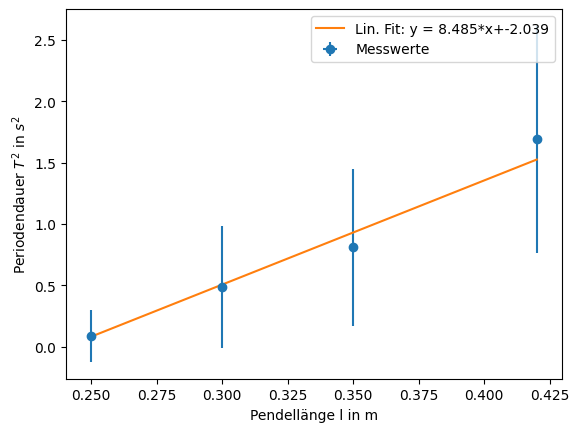

In [14]:
def fit_lin(x, b, a): # Funktion für lineare Regression
    return b*x + a

from scipy.optimize import curve_fit
# ----- Mit Fehlerbalken: ---- #

lin_fit = curve_fit(fit_lin, l_data, T_data**2, sigma=u_T2_data) # mit Fehlerbalken 
#lin_fit = curve_fit(fit_lin, l_data, T_data**2) # ohne Fehlerbalken


plt.errorbar(l_data,T_data**2, fmt='o', xerr = u_l_data, yerr = u_T2_data, label = 'Messwerte')
plt.plot(l_data,fit_lin(l_data, lin_fit[0][0], lin_fit[0][1]), label = 'Lin. Fit: y = %5.3f*x+%5.3f'%(lin_fit[0][0], lin_fit[0][1]))
plt.xlabel('Pendellänge l in m')
plt.ylabel(r'Periodendauer $T^2$ in $s^2$')

plt.legend()
plt.show()


In [15]:
lin_fit[1]
lin_fit[1][0][0]

0.6446793766617088

In [16]:
print('Die Erdbeschleunigung nach Steigung berechnet beträgt:')
print('(',lin_fit[0][0] ,'+-',  np.sqrt(lin_fit[1][0][0]), ') m/s^2')

Die Erdbeschleunigung nach Steigung berechnet beträgt:
( 8.485406802614317 +- 0.8029192840265508 ) m/s^2


In [17]:
u_T2_data

array([0.92287891, 0.63891617, 0.4969348 , 0.21297206])